In [1]:
# Montando o drive para o dataset

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [57]:
#Carregando a base de dados
df = pd.read_csv('/path/file/dataset.csv')


**Processamento/Tratamento dos dados**

In [58]:
#Identificando as variáveis nulas
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [59]:
#Desta forma para eliminar inconsistenes na base, iremos apagar linhas com valores vazios na coluna bmi
df = df.dropna(subset=['bmi'])
#O campo id não será necessário para nossa análise, a coluna será removida
df = df.drop('id', axis=1)

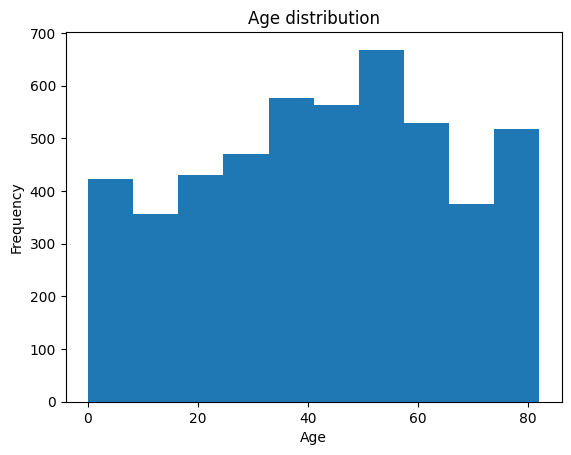

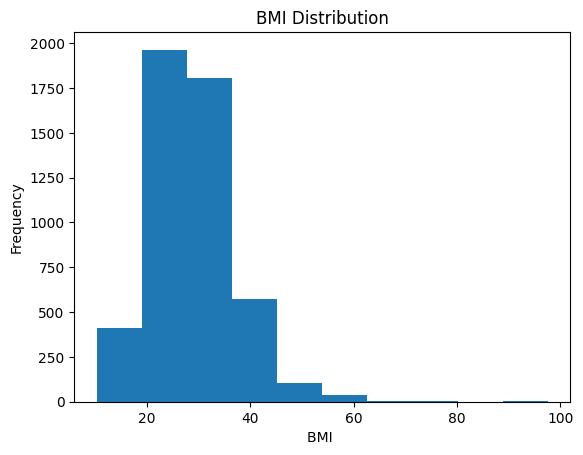

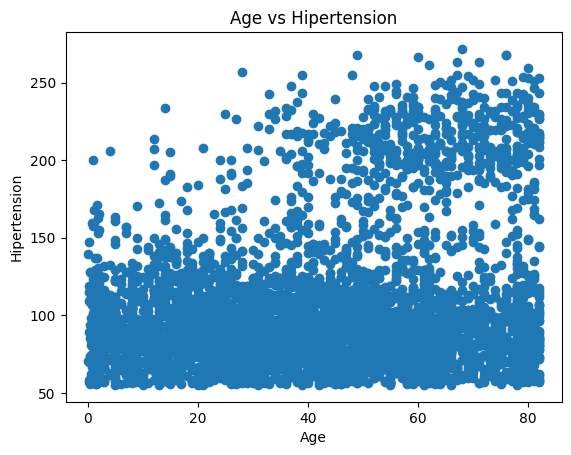

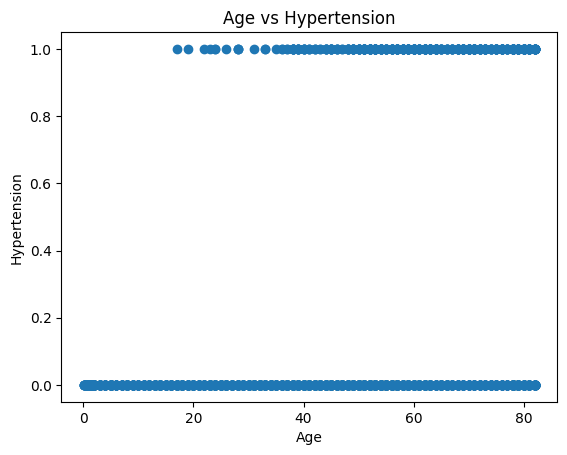

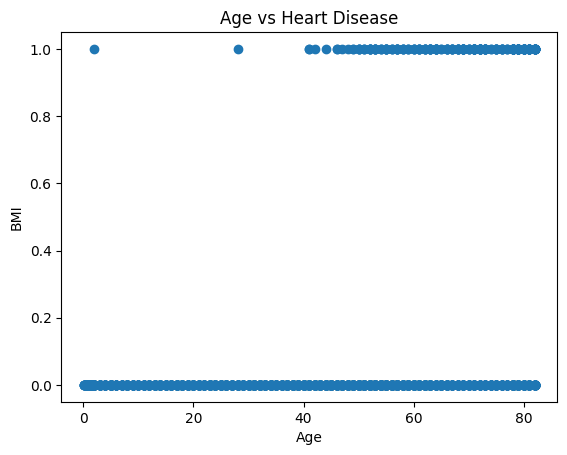

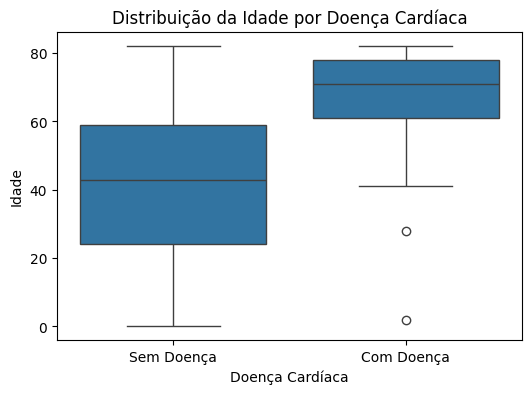

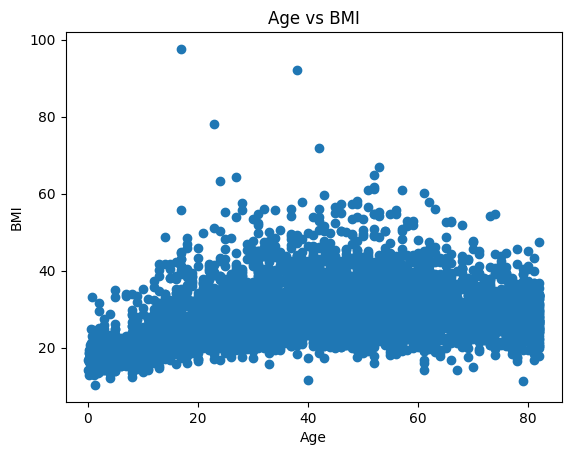

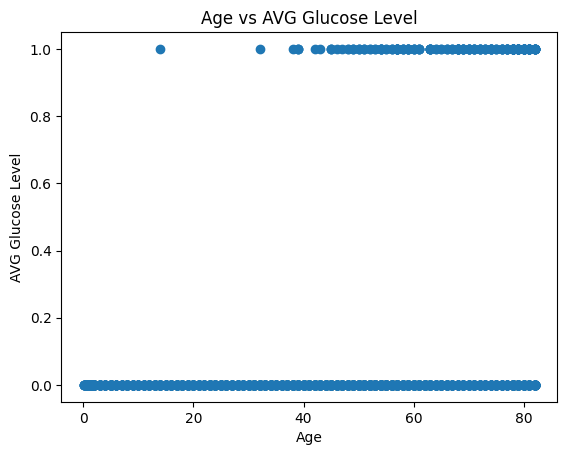

<ipython-input-60-2e58c0c5a24f>:63: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df.corr()


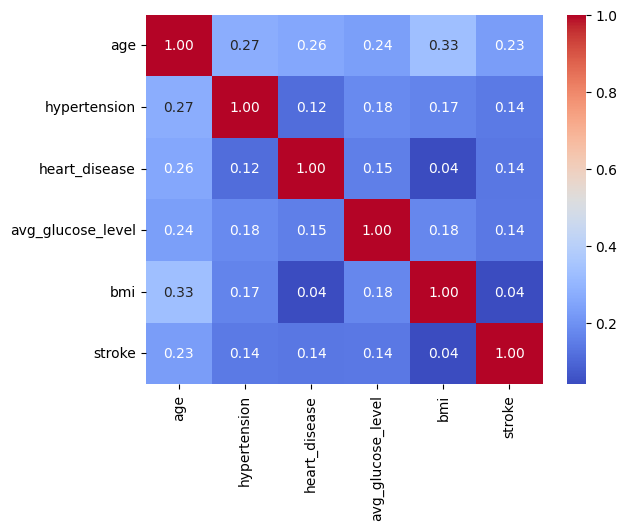

In [60]:
# Análise das variáveis e seus relacionamentos

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import zscore

plt.hist(df['age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['bmi'])
plt.xlabel('BMI ')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

# Idade X IMC
plt.scatter(df['age'], df['avg_glucose_level'])
plt.xlabel('Age')
plt.ylabel('Hipertension')
plt.title('Age vs Hipertension')
plt.show()

# Idade X Hipertensão
plt.scatter(df['age'], df['hypertension'])
plt.xlabel('Age')
plt.ylabel('Hypertension')
plt.title('Age vs Hypertension')
plt.show()

# Idade X Doença cardíaca
plt.scatter(df['age'], df['heart_disease'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs Heart Disease')
plt.show()

# Criar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title('Distribuição da Idade por Doença Cardíaca')
plt.xlabel('Doença Cardíaca')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()
# Idade X IMC
plt.scatter(df['age'], df['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()
# Idade X Doença cardíaca
plt.scatter(df['age'], df['stroke'])
plt.xlabel('Age')
plt.ylabel('AVG Glucose Level')
plt.title('Age vs AVG Glucose Level')
plt.show()

# Matriz de correlação
matriz_correlacao = df.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

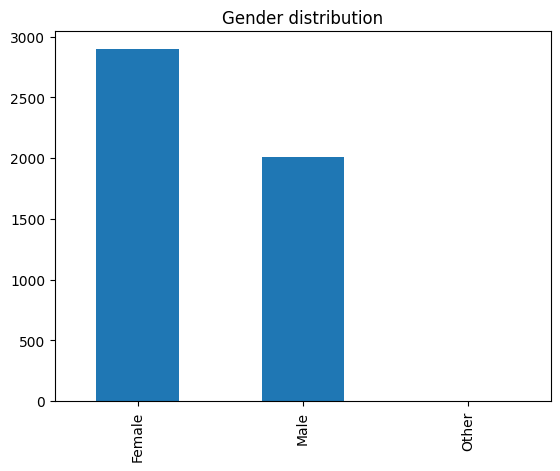

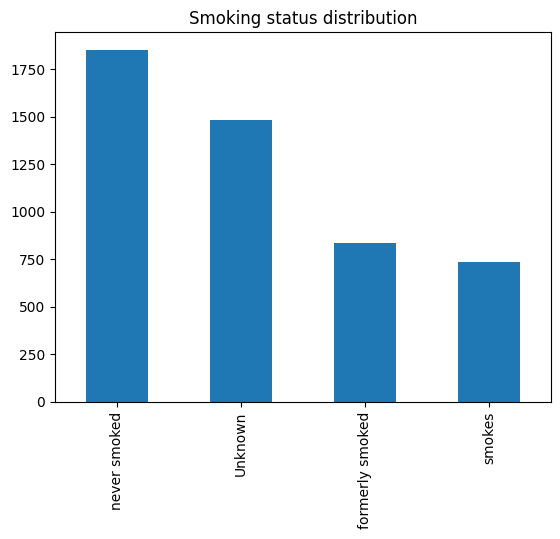

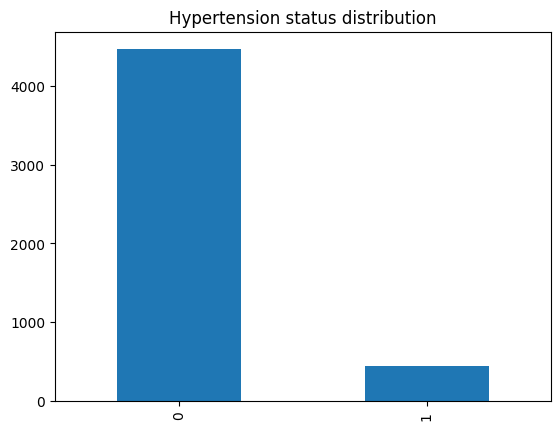

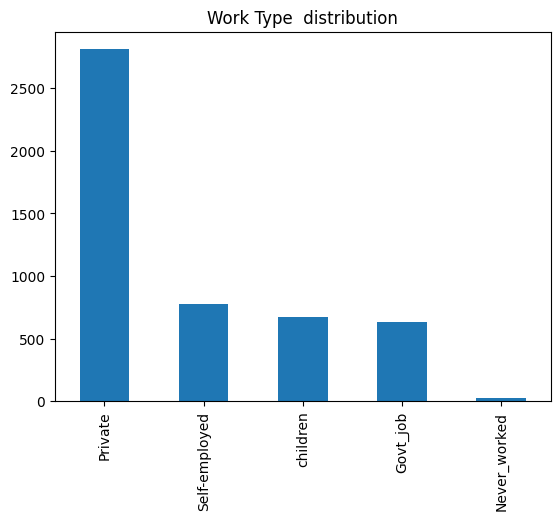

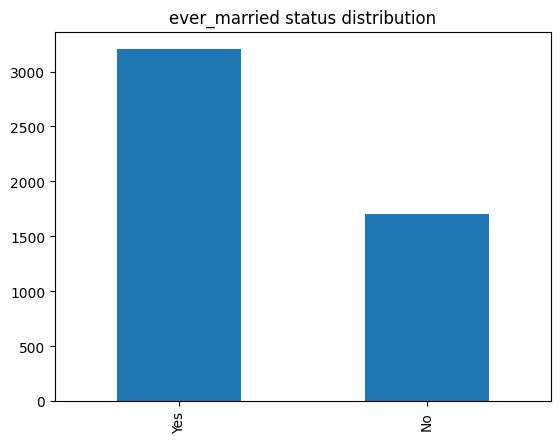

In [61]:

df['gender'].value_counts()

df['gender'].value_counts().plot(kind='bar', title='Gender distribution')
plt.show()

df['smoking_status'].value_counts()

df['smoking_status'].value_counts().plot(kind='bar', title='Smoking status distribution')
plt.show()

df['hypertension'].value_counts()

df['hypertension'].value_counts().plot(kind='bar', title='Hypertension status distribution')
plt.show()

df['work_type'].value_counts()

df['work_type'].value_counts().plot(kind='bar', title='Work Type  distribution')
plt.show()

df['ever_married'].value_counts()

df['ever_married'].value_counts().plot(kind='bar', title='ever_married status distribution')
plt.show()


A coluna 'gender' não contém dados numéricos e não pode ser exibida no boxplot.


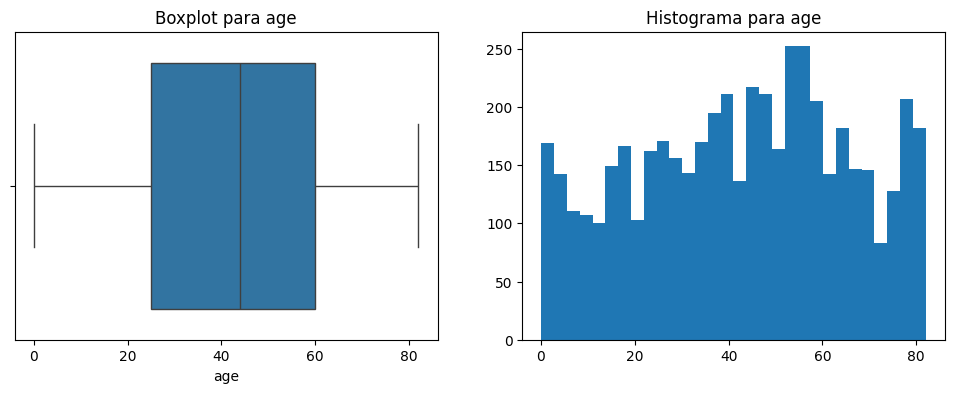

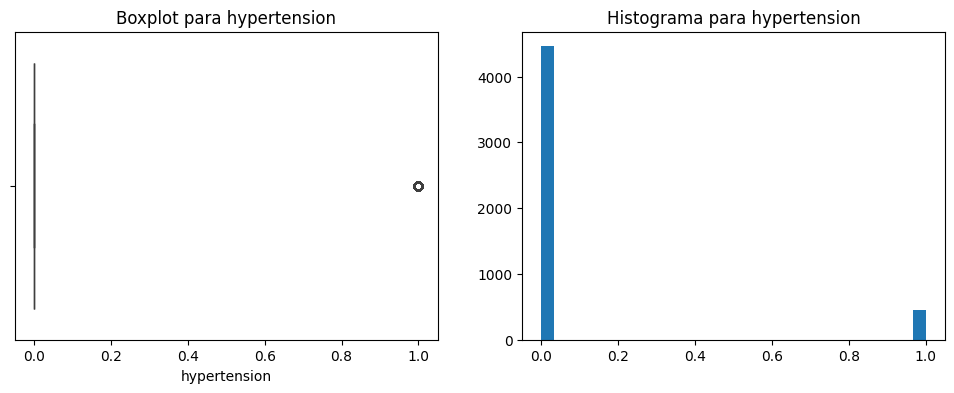

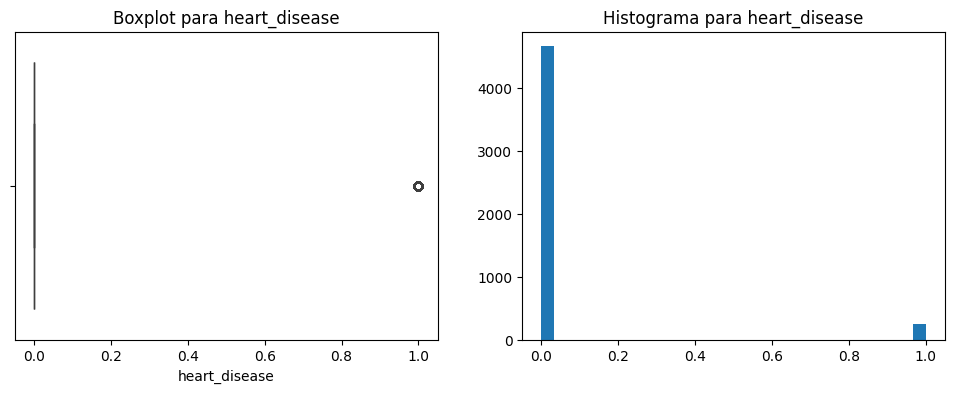

A coluna 'ever_married' não contém dados numéricos e não pode ser exibida no boxplot.
A coluna 'work_type' não contém dados numéricos e não pode ser exibida no boxplot.
A coluna 'Residence_type' não contém dados numéricos e não pode ser exibida no boxplot.


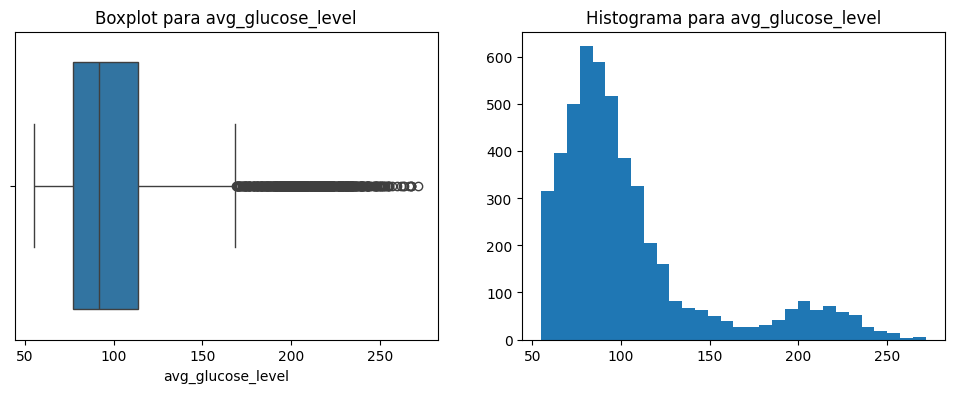

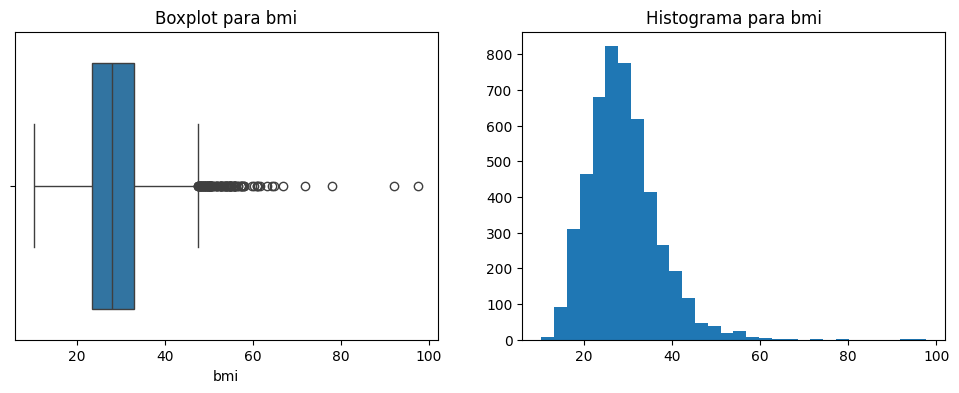

A coluna 'smoking_status' não contém dados numéricos e não pode ser exibida no boxplot.


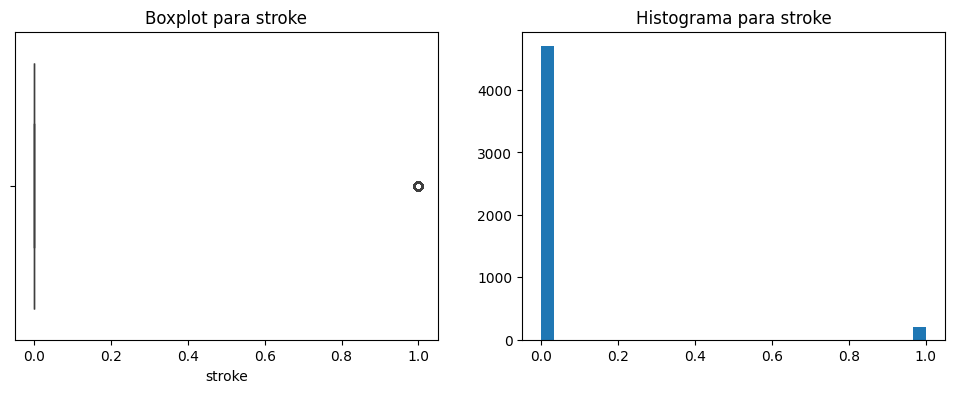

In [62]:
for column_name in df.columns:
   if pd.api.types.is_numeric_dtype(df[column_name]):
    # Criar boxplot
      plt.figure(figsize=(12, 4))
      plt.subplot(1, 2, 1)
      sns.boxplot(x=df[column_name])
      plt.title(f'Boxplot para {column_name}')

      # Criar histograma
      plt.subplot(1, 2, 2)
      plt.hist(df[column_name], bins=30)
      plt.title(f'Histograma para {column_name}')

      # Exibir os gráficos
      plt.show()

      # Calcular Z-Score e identificar outliers
      z_scores = zscore(df[column_name])
      outliers = (z_scores > 3) | (z_scores < -3)
      outlier_values = df[column_name][outliers]

   else:
      print(f"A coluna '{column_name}' não contém dados numéricos e não pode ser exibida no boxplot.")

# Separar bmi por faixa


In [63]:

df['bmi_faixa'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'])


# Separar idade por faixa etária

In [64]:

df['age_faixa'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])


# Separar média da glicose por faixa


In [65]:

df['avg_glucose_level_faixa'] = pd.cut(df['avg_glucose_level'], bins=[0, 99, 125, 150, 200, 1000], labels=['Normal', 'Prediabetes', 'Diabetes', 'High Diabetes', 'Extremely High Diabetes'])


# Apagando variáveis que eram continuas

In [66]:

df = df.drop(['bmi', 'age', 'avg_glucose_level'], axis=1)


# Transformando variáveis categóricas em binárias

In [67]:

df = pd.get_dummies(df)
# prompt: mover coluna stroke para o final do dataset
stroke_column = df.pop('stroke')
df.insert(len(df.columns), 'stroke', stroke_column)



**Análise exploratória dos dados**

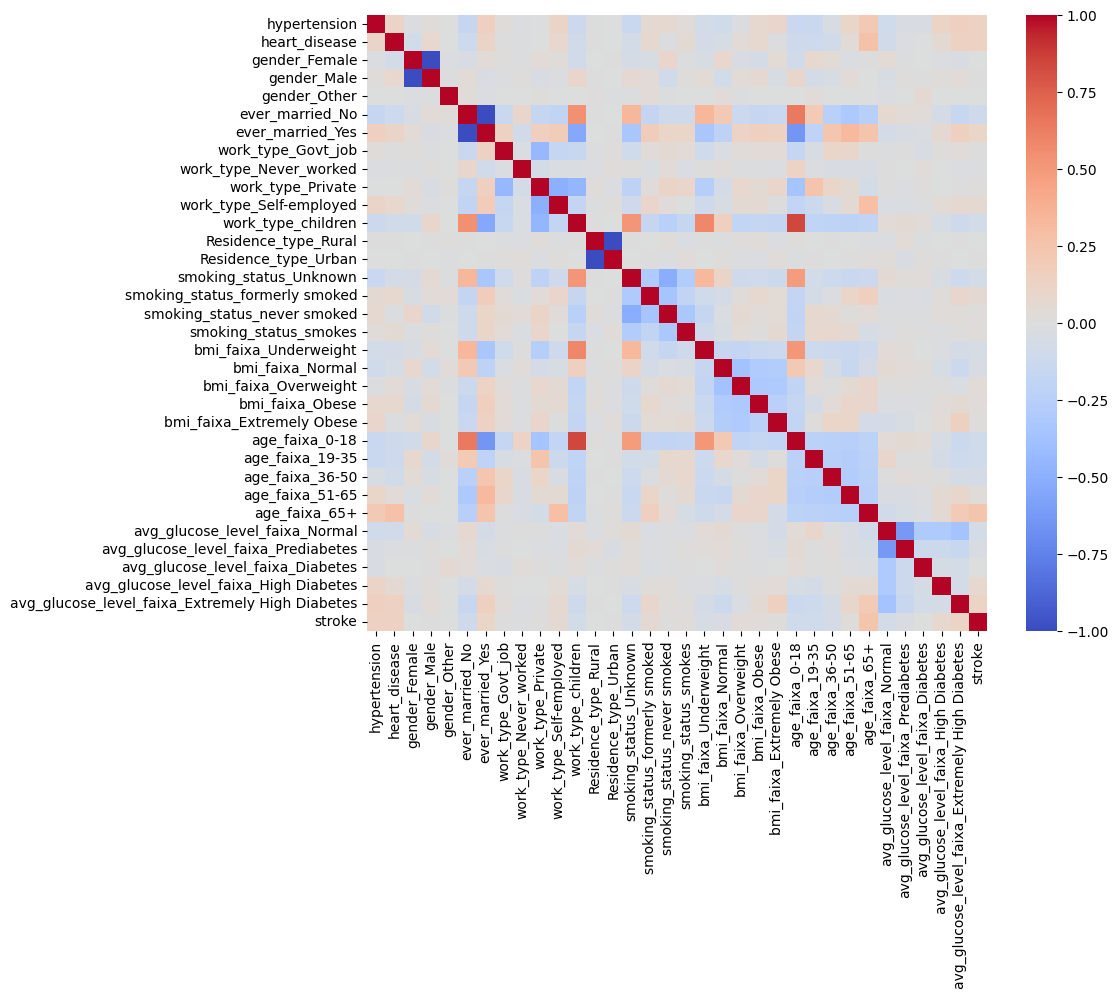

In [68]:
matriz_correlacao = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()


Separa em base de treinamento e testes

# Teste Oversampling E Smote no dataset

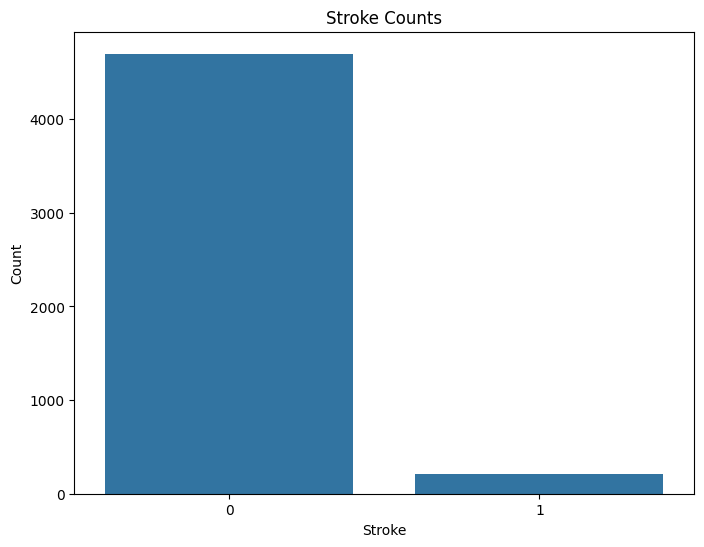

In [69]:

# Plot a bar chart of stroke counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke')
plt.title('Stroke Counts')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


In [70]:


from sklearn.utils import resample

#Upsampling minority class: stroke = 1
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]

df_minority_oversampled = resample(df_minority, replace = True, n_samples=4700, random_state=21)

df = pd.concat([df_majority, df_minority_oversampled])

df['stroke'].value_counts()


0    4700
1    4700
Name: stroke, dtype: int64

In [71]:
X = df.iloc[:,0:(df.shape[1] - 1)]

y = df.iloc[:,(df.shape[1] - 1)]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)



**Regressão Linear**

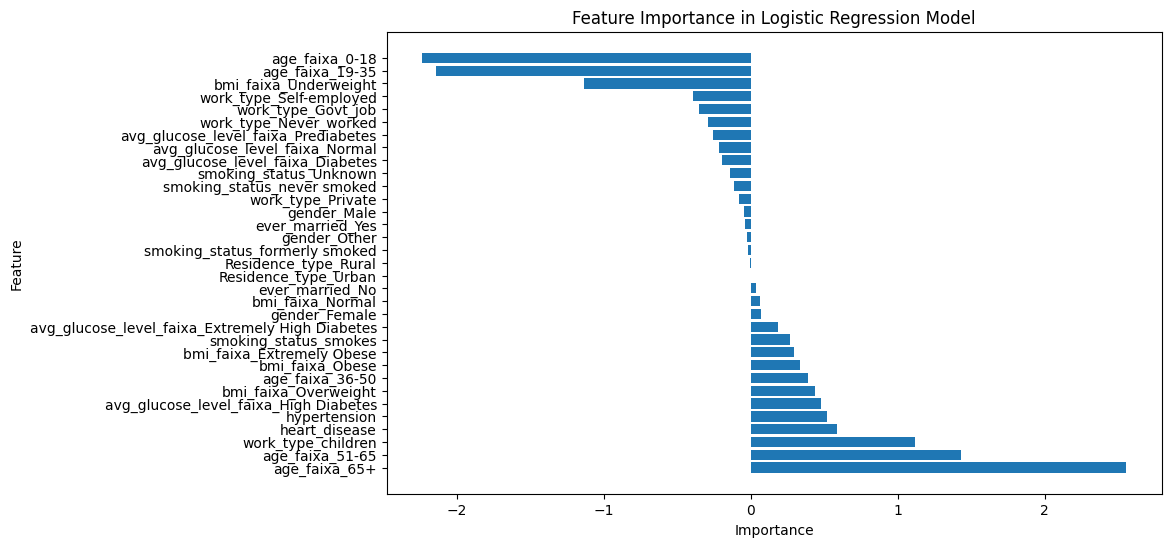

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Treinando um modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Obtendo as importâncias das características
feature_importances = model.coef_[0]

# Criando um DataFrame para melhor visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotando as importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
PCA(n_components=4),
LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_smote_pred = pipe_lr.predict(X_test)
print('Test accuracy: %.4f' % pipe_lr.score(X_test, y_test))


Test accuracy: 0.7206


Validação cruzada k-fold

A validação cruzada k-fold é uma técnica comum para avaliar o desempenho de um modelo de machine learning.

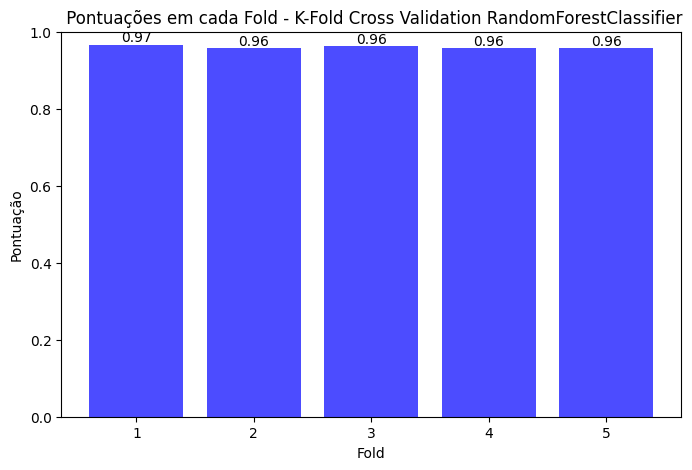

In [73]:
#K-FOLD RandomForestClassifier

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Substitua pelo seu modelo específico

# Número de folds desejado
num_folds = 5

# Crie um objeto KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Substitua RandomForestClassifier pelo seu modelo específico
model = RandomForestClassifier()

# Execute a validação cruzada e obtenha as pontuações de cada fold
pontuacoes = cross_val_score(model, X_train, y_train, cv=kf)

# Exiba um gráfico de barras das pontuações
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, num_folds + 1), pontuacoes, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Pontuação')
plt.title(' Pontuações em cada Fold - K-Fold Cross Validation RandomForestClassifier' )
plt.ylim([0, 1])
# Adicione os valores de pontuação em cima de cada barra
for bar, pontuacao in zip(bars, pontuacoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pontuacao:.2f}',
             ha='center', va='bottom')
plt.show()

In [74]:
#TREINAMENTO DO MODELO
# Treine o modelo no conjunto de treinamento
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
previsoes = model.predict(X_test)

# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia no conjunto de teste: {acuracia:.4f}')

Acurácia no conjunto de teste: 0.9681


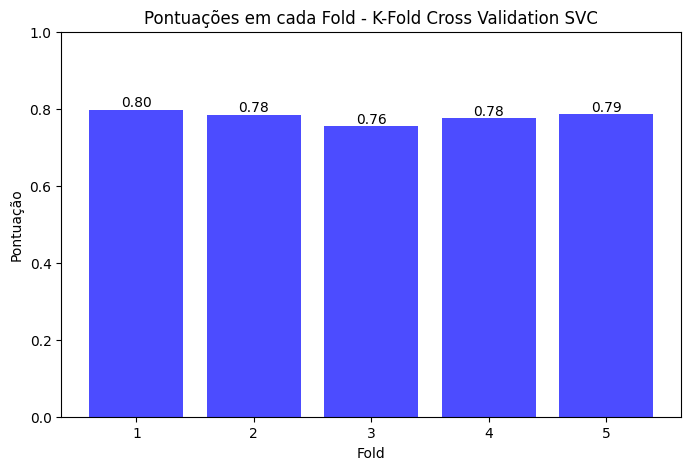

In [83]:
#K-FOLD SVC

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Substitua pelo seu modelo específico
from sklearn.svm import SVC


# Número de folds desejado
num_folds = 5

# Crie um objeto KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Substitua SVC pelo seu modelo específico

model = SVC(kernel='rbf', gamma='auto')

# Execute a validação cruzada e obtenha as pontuações de cada fold
pontuacoes = cross_val_score(model, X_train, y_train, cv=kf)

# Exiba um gráfico de barras das pontuações
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, num_folds + 1), pontuacoes, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Pontuação')
plt.title('Pontuações em cada Fold - K-Fold Cross Validation SVC')
plt.ylim([0, 1])
# Adicione os valores de pontuação em cima de cada barra
for bar, pontuacao in zip(bars, pontuacoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pontuacao:.2f}',
             ha='center', va='bottom')
plt.show()


In [84]:
#TREINAMENTO DO MODELO
# Treine o modelo no conjunto de treinamento
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
previsoes = model.predict(X_test)

# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia no conjunto de test SVC: {acuracia:.4f}')

Acurácia no conjunto de test SVC: 0.7833


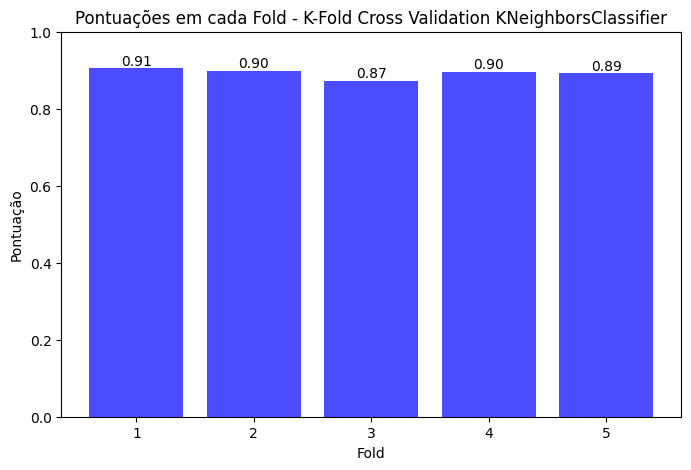

In [85]:
#K-FOLD KNeighborsClassifier

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Substitua pelo seu modelo específico
from sklearn.neighbors import KNeighborsClassifier


# Número de folds desejado
num_folds = 5

# Crie um objeto KNeighborsClassifier
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

#  KNeighborsClassifier pelo seu modelo específico
model = KNeighborsClassifier(n_neighbors=5)

# Execute a validação cruzada e obtenha as pontuações de cada fold
pontuacoes = cross_val_score(model, X_train, y_train, cv=kf)

# Exiba um gráfico de barras das pontuações
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, num_folds + 1), pontuacoes, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Pontuação')
plt.title('Pontuações em cada Fold - K-Fold Cross Validation KNeighborsClassifier')
plt.ylim([0, 1])
# Adicione os valores de pontuação em cima de cada barra
for bar, pontuacao in zip(bars, pontuacoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pontuacao:.2f}',
             ha='center', va='bottom')
plt.show()

In [86]:
#TREINAMENTO DO MODELO
# Treine o modelo no conjunto de treinamento
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
previsoes = model.predict(X_test)

# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia no conjunto de test KNeighborsClassifier: {acuracia:.4f}')

Acurácia no conjunto de test KNeighborsClassifier: 0.9004


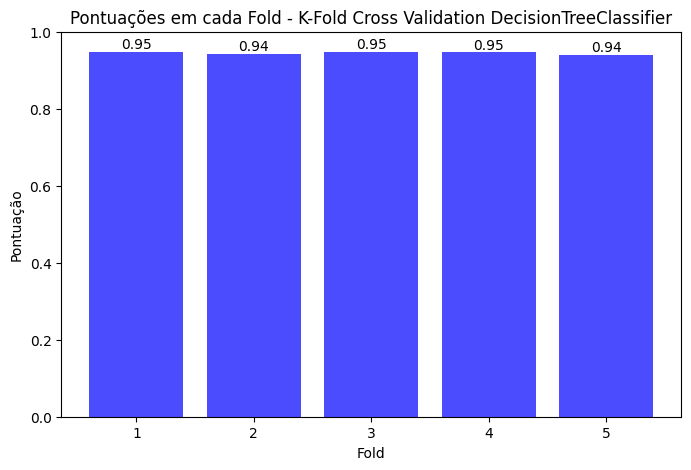

In [87]:
#K-FOLD DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Substitua pelo seu modelo específico
from sklearn.tree import DecisionTreeClassifier


# Número de folds desejado
num_folds = 5

# Crie um objeto DecisionTreeClassifier
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

#  DecisionTreeClassifier pelo seu modelo específico
model = DecisionTreeClassifier()

# Execute a validação cruzada e obtenha as pontuações de cada fold
pontuacoes = cross_val_score(model, X_train, y_train, cv=kf)

# Exiba um gráfico de barras das pontuações
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, num_folds + 1), pontuacoes, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Pontuação')
plt.title('Pontuações em cada Fold - K-Fold Cross Validation DecisionTreeClassifier')
plt.ylim([0, 1])
# Adicione os valores de pontuação em cima de cada barra
for bar, pontuacao in zip(bars, pontuacoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pontuacao:.2f}',
             ha='center', va='bottom')
plt.show()

In [88]:
#TREINAMENTO DO MODELO
# Treine o modelo no conjunto de treinamento
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
previsoes = model.predict(X_test)

# Avalie o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia no conjunto de test DecisionTreeClassifier: {acuracia:.4f}')

Acurácia no conjunto de test DecisionTreeClassifier: 0.9610


42/42 [==============================] - 0s 2ms/step


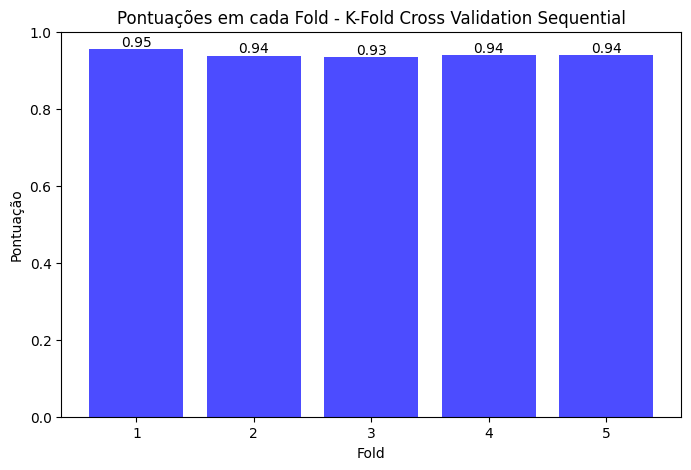

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Função para construir o modelo Sequential
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Número de folds desejado
num_folds = 5

# Criar um objeto KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lista para armazenar as pontuações de cada fold
pontuacoes = []

# Loop sobre os folds
for train_index, test_index in kf.split(X_train):
    # Dividir os dados em conjuntos de treinamento e teste para este fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Construir o modelo Sequential
    model = build_model()

    # Treinar o modelo
    model.fit(X_train_fold, y_train_fold, epochs=100, verbose=0)

    # Fazer previsões no conjunto de teste
    predictions_proba = model.predict(X_test_fold)

    # Converter probabilidades em classes usando um limiar (threshold)
    predictions_classes = np.where(predictions_proba > 0.5, 1, 0)

    # Calcular a pontuação de acurácia e armazená-la
    accuracy = accuracy_score(y_test_fold, predictions_classes)
    pontuacoes.append(accuracy)

# Exiba um gráfico de barras das pontuações
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, num_folds + 1), pontuacoes, color='blue', alpha=0.7)
plt.xlabel('Fold')
plt.ylabel('Pontuação')
plt.title('Pontuações em cada Fold - K-Fold Cross Validation Sequential')
plt.ylim([0, 1])
# Adicione os valores de pontuação em cima de cada barra
for bar, pontuacao in zip(bars, pontuacoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pontuacao:.2f}',
             ha='center', va='bottom')
plt.show()

# Algorítmos de Machine Learning Implementados - Cálculo de Previsões
#Após as previsões podemos podemos testar para um novo individuo

In [18]:
#Realizar uma predição de um indivíduo

novo_individuo = pd.DataFrame(
{'hypertension': 0,
 'heart_disease': 1,
 'gender_Female': 0,
 'gender_Male': 1,
 'gender_Other': 0,
 'ever_married_No': 0,
 'ever_married_Yes': 1,
 'work_type_Govt_job': 0,
 'work_type_Never_worked': 0,
 'work_type_Private': 1,
 'work_type_Self-employed': 0,
 'work_type_children': 0,
 'Residence_type_Rural': 0,
 'Residence_type_Urban': 1,
 'smoking_status_Unknown': 0,
 'smoking_status_formerly smoked': 1,
 'smoking_status_never smoked': 0,
 'smoking_status_smokes': 0,
 'bmi_faixa_Underweight': 0,
 'bmi_faixa_Normal': 0,
 'bmi_faixa_Overweight': 0,
 'bmi_faixa_Obese': 0,
 'bmi_faixa_Extremely Obese': 1,
 'age_faixa_0-18': 0,
 'age_faixa_19-35': 0,
 'age_faixa_36-50': 0,
 'age_faixa_51-65': 0,
 'age_faixa_65+': 1,
 'avg_glucose_level_faixa_Normal': 0,
 'avg_glucose_level_faixa_Prediabetes': 0,
 'avg_glucose_level_faixa_Diabetes': 0,
 'avg_glucose_level_faixa_High Diabetes': 0,
 'avg_glucose_level_faixa_Extremely High Diabetes': 1,
}, index=[0])



In [19]:

import random

# Selecione uma linha aleatória do DataFrame onde 'stroke' é diferente de 1
random_row = df[df['stroke'] != 1].sample(1)

# Converta a linha selecionada em um dicionário
random_dict = random_row.to_dict('records')[0]

# Exiba o dicionário
random_dict


{'hypertension': 0,
 'heart_disease': 0,
 'gender_Female': 0,
 'gender_Male': 1,
 'gender_Other': 0,
 'ever_married_No': 0,
 'ever_married_Yes': 1,
 'work_type_Govt_job': 0,
 'work_type_Never_worked': 0,
 'work_type_Private': 1,
 'work_type_Self-employed': 0,
 'work_type_children': 0,
 'Residence_type_Rural': 1,
 'Residence_type_Urban': 0,
 'smoking_status_Unknown': 0,
 'smoking_status_formerly smoked': 0,
 'smoking_status_never smoked': 1,
 'smoking_status_smokes': 0,
 'bmi_faixa_Underweight': 0,
 'bmi_faixa_Normal': 0,
 'bmi_faixa_Overweight': 0,
 'bmi_faixa_Obese': 1,
 'bmi_faixa_Extremely Obese': 0,
 'age_faixa_0-18': 0,
 'age_faixa_19-35': 0,
 'age_faixa_36-50': 1,
 'age_faixa_51-65': 0,
 'age_faixa_65+': 0,
 'avg_glucose_level_faixa_Normal': 1,
 'avg_glucose_level_faixa_Prediabetes': 0,
 'avg_glucose_level_faixa_Diabetes': 0,
 'avg_glucose_level_faixa_High Diabetes': 0,
 'avg_glucose_level_faixa_Extremely High Diabetes': 0,
 'stroke': 0}

\**Aqui um algoritmo de machine learning RandomForestClassifier**


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando e treinando o modelo RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazendo previsões e avaliando o desempenho do modelo
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("A precisão do modelo é:", accuracy)


print(model)
probabilidades = model.predict_proba(novo_individuo)
probabilidade_stroke = probabilidades[:, 1]  # Se a classe 1 representa o AVC
print(probabilidades)
# Imprima a previsão

predicao_novo_individuo = model.predict(novo_individuo)

print('A predição do individuo é de %:',predicao_novo_individuo)

print('O risco do individuo é de %:', probabilidade_stroke[0]*100)

#AVALIACAO DO MODELO
print("********************** AVALIAÇÃO DO MODELO***********************************")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 1. Acurácia
accuracyRFC = accuracy_score(y_test, predictions)
print("Acurácia:", accuracyRFC)

# 2. Precisão
precisionRFC = precision_score(y_test, predictions)
print("Precisão:", precisionRFC)

# 3. Recall
recallRFC = recall_score(y_test, predictions)
print("Recall:", recallRFC)

# 4. F1-score
f1RFC = f1_score(y_test, predictions)
print("F1-score:", f1RFC)

# 5. Área sob a curva ROC (AUC-ROC)
roc_aucRFC = roc_auc_score(y_test, predictions)
print("AUC-ROC:", roc_aucRFC)

# 6. Matriz de Confusão
conf_matrixRFC = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(conf_matrixRFC)


A precisão do modelo é: 0.9670212765957447
RandomForestClassifier()
[[0. 1.]]
A predição do individuo é de %: [1]
O risco do individuo é de %: 100.0
********************** AVALIAÇÃO DO MODELO***********************************
Acurácia: 0.9670212765957447
Precisão: 0.93812375249501
Recall: 1.0
F1-score: 0.9680741503604532
AUC-ROC: 0.9670212765957447
Matriz de Confusão:
[[1317   93]
 [   0 1410]]


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Criando e treinando o modelo SVC
model = SVC(kernel='rbf', gamma='auto') # Você pode ajustar os parâmetros do kernel conforme necessário
model.fit(X_train, y_train)

# Fazendo previsões e avaliando o desempenho do modelo
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("A precisão do modelo é:", accuracy)
#probabilidades = model.predict_proba(novo_individuo)
print(model.classes_)

probabilidade_stroke = probabilidades[:, 1]  # Se a classe 1 representa o AVC
print(probabilidades)
# Imprima a previsão
predicao_novo_individuo = model.predict(novo_individuo)

print('A predição do individuo é de %:',predicao_novo_individuo)
print('O risco do individuo é de %:', probabilidade_stroke[0]*100)

print("********************** AVALIAÇÃO DO MODELO***********************************")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 1. Acurácia
accuracySVC = accuracy_score(y_test, predictions)
print("Acurácia:", accuracySVC)

# 2. Precisão
precisionSVC = precision_score(y_test, predictions)
print("Precisão:", precisionSVC)

# 3. Recall
recallSVC = recall_score(y_test, predictions)
print("Recall:", recallSVC)

# 4. F1-score
f1SVC = f1_score(y_test, predictions)
print("F1-score:", f1SVC)

# 5. Área sob a curva ROC (AUC-ROC)
roc_aucSVC = roc_auc_score(y_test, predictions)
print("AUC-ROC:", roc_aucSVC)

# 6. Matriz de Confusão
conf_matrixSVC = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(conf_matrixSVC)



A precisão do modelo é: 0.7833333333333333
[0 1]
[[0. 1.]]
A predição do individuo é de %: [1]
O risco do individuo é de %: 100.0
********************** AVALIAÇÃO DO MODELO***********************************
Acurácia: 0.7833333333333333
Precisão: 0.7458461538461538
Recall: 0.8595744680851064
F1-score: 0.7986820428336078
AUC-ROC: 0.7833333333333334
Matriz de Confusão:
[[ 997  413]
 [ 198 1212]]


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando o modelo KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Fazendo previsões e avaliando o desempenho do modelo
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("A precisão do modelo é:", accuracy)

prediction_novo_individuo = model.predict_proba(novo_individuo)

# Extrair a probabilidade de pertencer à classe positiva (1 - AVC)
probabilidade_avc = prediction_novo_individuo[0][1]  # Índice 1 corresponde à classe positiva
print(prediction_novo_individuo)

predicao_novo_individuo = model.predict(novo_individuo)

print('A predição do individuo é de %:',predicao_novo_individuo)

print("O risco do individuo é de %:", probabilidade_avc*100)

print("********************** AVALIAÇÃO DO MODELO***********************************")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 1. Acurácia
accuracyKNC = accuracy_score(y_test, predictions)
print("Acurácia:", accuracyKNC)

# 2. Precisão
precisionKNC = precision_score(y_test, predictions)
print("Precisão:", precisionKNC)

# 3. Recall
recallKNC = recall_score(y_test, predictions)
print("Recall:", recallKNC)

# 4. F1-score
f1KNC = f1_score(y_test, predictions)
print("F1-score:", f1KNC)

# 5. Área sob a curva ROC (AUC-ROC)
roc_aucKNC = roc_auc_score(y_test, predictions)
print("AUC-ROC:", roc_aucKNC)

# 6. Matriz de Confusão
conf_matrixKNC = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(conf_matrixKNC)

A precisão do modelo é: 0.900354609929078
[[0. 1.]]
A predição do individuo é de %: [1]
O risco do individuo é de %: 100.0
********************** AVALIAÇÃO DO MODELO***********************************
Acurácia: 0.900354609929078
Precisão: 0.8427443837279903
Recall: 0.9843971631205674
F1-score: 0.9080798168138698
AUC-ROC: 0.9003546099290779
Matriz de Confusão:
[[1151  259]
 [  22 1388]]


In [23]:
#ALGORITMO DecisionTreeClassifier
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#DECISIONTREECLASSIFIER
X_train.columns
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Calculando a precisão do modelo
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("A precisão do modelo é:", accuracy)

prediction_novo_individuo = model.predict(novo_individuo)

predicao_novo_individuo = model.predict(novo_individuo)

print('A predição do individuo é de %:',predicao_novo_individuo)

print('O risco do individuo é de :', prediction_novo_individuo)

print("********************** AVALIAÇÃO DO MODELO***********************************")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 1. Acurácia
accuracyDTC = accuracy_score(y_test, predictions)
print("Acurácia:", accuracyDTC)

# 2. Precisão
precisionDTC = precision_score(y_test, predictions)
print("Precisão:", precisionDTC)

# 3. Recall
recallDTC = recall_score(y_test, predictions)
print("Recall:", recallDTC)

# 4. F1-score
f1DTC = f1_score(y_test, predictions)
print("F1-score:", f1DTC)

# 5. Área sob a curva ROC (AUC-ROC)
roc_aucDTC = roc_auc_score(y_test, predictions)
print("AUC-ROC:", roc_aucDTC)

# 6. Matriz de Confusão
conf_matrixDTC = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(conf_matrixDTC)

A precisão do modelo é: 0.9609929078014184
A predição do individuo é de %: [1]
O risco do individuo é de : [1]
********************** AVALIAÇÃO DO MODELO***********************************
Acurácia: 0.9609929078014184
Precisão: 0.9276315789473685
Recall: 1.0
F1-score: 0.962457337883959
AUC-ROC: 0.9609929078014184
Matriz de Confusão:
[[1300  110]
 [   0 1410]]


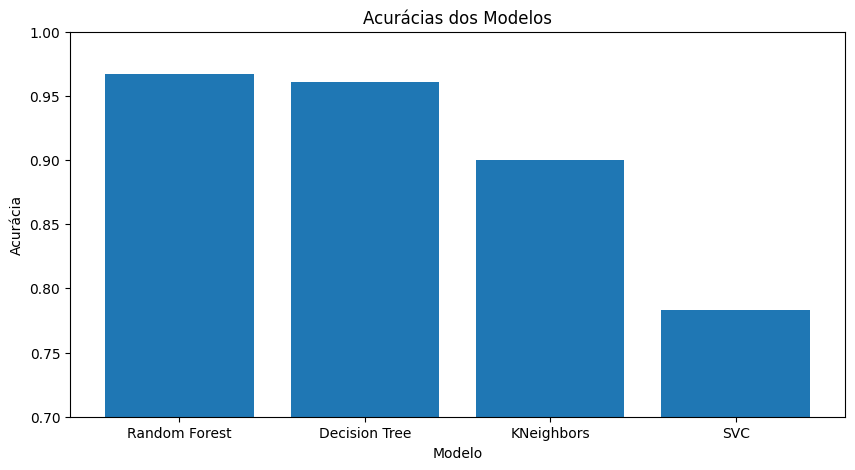

In [27]:

# Gráfico de barras das acurácias dos modelos
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest','Decision Tree', 'KNeighbors','SVC'],
         [accuracyRFC,accuracyDTC, accuracyKNC, accuracySVC])
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Acurácias dos Modelos')
plt.ylim([0.7, 1])
plt.show()


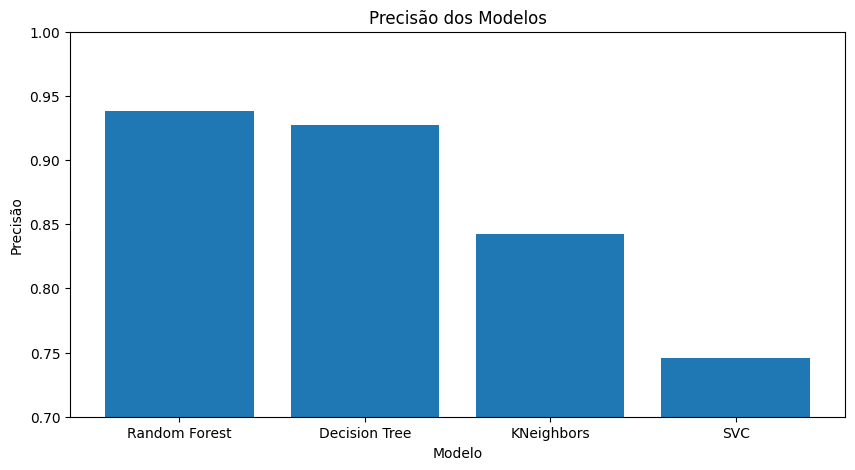

In [28]:

# Gráfico de barras precisão dos modelos
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest','Decision Tree', 'KNeighbors','SVC'],
         [precisionRFC,precisionDTC, precisionKNC, precisionSVC])
plt.xlabel('Modelo')
plt.ylabel('Precisão')
plt.title('Precisão dos Modelos')
plt.ylim([0.7, 1])
plt.show()

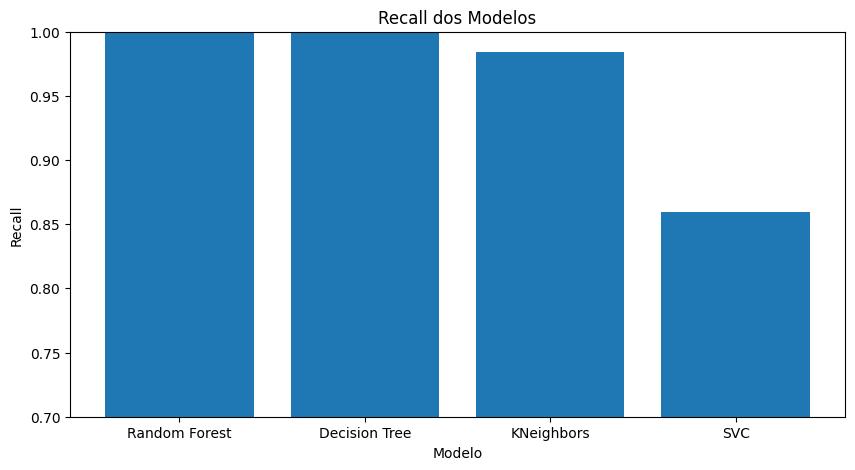

In [29]:
# prompt: repita o grafico na celula de cima, mas agora para recall

# Gráfico de barras recall dos modelos
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest','Decision Tree', 'KNeighbors','SVC'],
         [recallRFC,recallDTC, recallKNC, recallSVC])
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.title('Recall dos Modelos')
plt.ylim([0.7, 1])
plt.show()


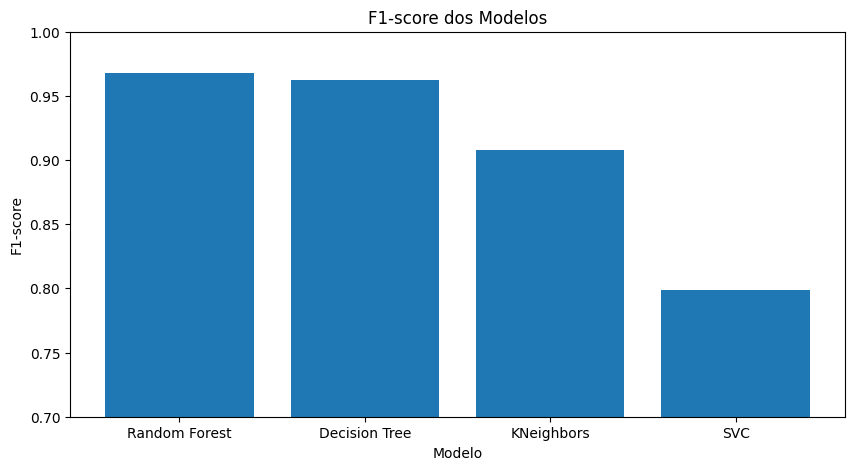

In [30]:

# Gráfico de barras f1 dos modelos
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest','Decision Tree', 'KNeighbors','SVC'],
         [f1RFC,f1DTC, f1KNC, f1SVC])
plt.xlabel('Modelo')
plt.ylabel('F1-score')
plt.title('F1-score dos Modelos')
plt.ylim([0.7, 1])
plt.show()


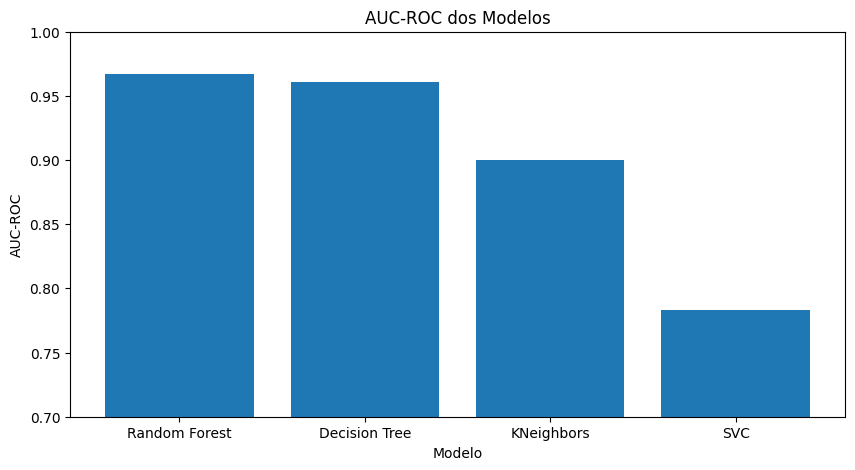

In [31]:

# Gráfico de barras roc dos modelos
plt.figure(figsize=(10, 5))
plt.bar(['Random Forest','Decision Tree', 'KNeighbors','SVC'],
         [roc_aucRFC,roc_aucDTC, roc_aucKNC, roc_aucSVC])
plt.xlabel('Modelo')
plt.ylabel('AUC-ROC')
plt.title('AUC-ROC dos Modelos')
plt.ylim([0.7, 1])
plt.show()


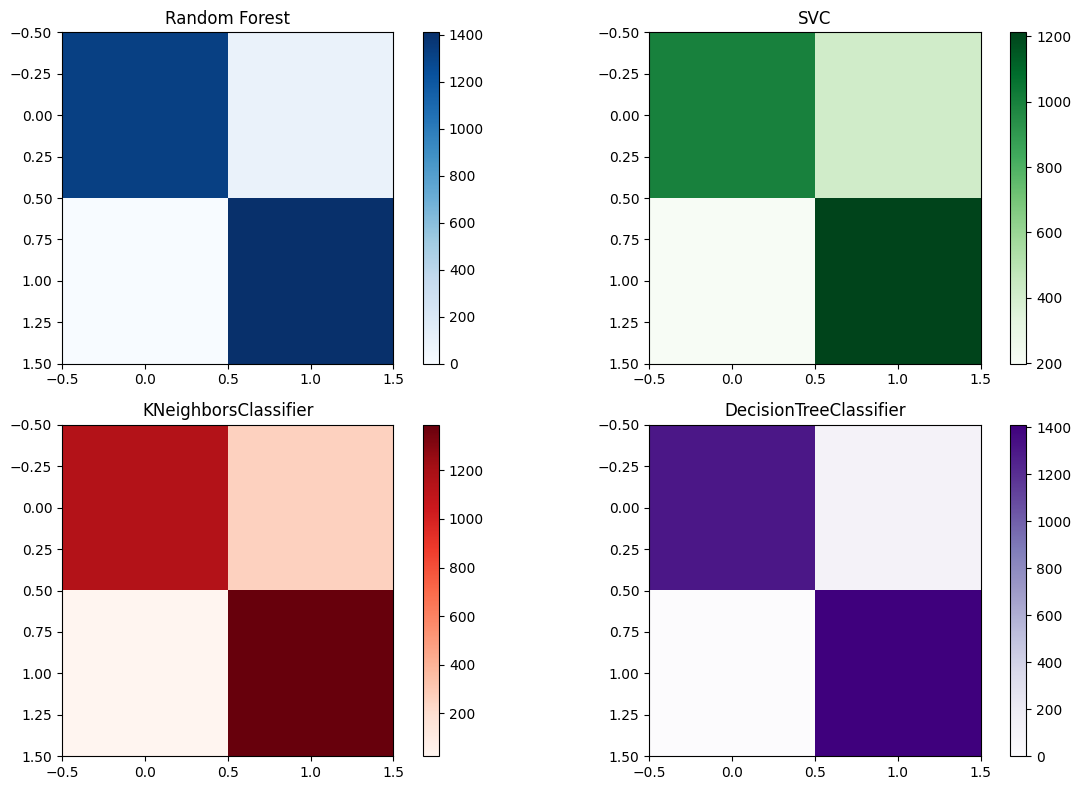

In [32]:

# Plot the confusion matrices
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(conf_matrixRFC, cmap='Blues')
plt.title('Random Forest')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(conf_matrixSVC, cmap='Greens')
plt.title('SVC')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(conf_matrixKNC, cmap='Reds')
plt.title('KNeighborsClassifier')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(conf_matrixDTC, cmap='Purples')
plt.title('DecisionTreeClassifier')
plt.colorbar()

plt.tight_layout()
plt.show()


In [33]:

print("********************** MATRIZES DE CONFUSAO ***********************************")
print("Matriz de Confusão Random Forest:")
print(conf_matrixRFC)
print("Matriz de Confusão SVC:")
print(conf_matrixSVC)
print("Matriz de Confusão KNeighborsClassifier:")
print(conf_matrixKNC)
print("Matriz de Confusão DecisionTreeClassifier:")
print(conf_matrixDTC)


********************** MATRIZES DE CONFUSAO ***********************************
Matriz de Confusão Random Forest:
[[1317   93]
 [   0 1410]]
Matriz de Confusão SVC:
[[ 997  413]
 [ 198 1212]]
Matriz de Confusão KNeighborsClassifier:
[[1151  259]
 [  22 1388]]
Matriz de Confusão DecisionTreeClassifier:
[[1300  110]
 [   0 1410]]


In [ ]:
#TENSOR FLOW - REDES NEURAIS ALGORITMO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())

model.add(Dense(units=1, activation='sigmoid') )  # Saída única
model.add(Dropout(0.2))  # Adiciona dropout com uma taxa de 20%

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #melhor para classificacao binaria
#Treine o modelo usando seus dados de treinamento.

model.fit(X_train, y_train, epochs=30)

#Avalie o desempenho do modelo usando seus dados de teste.
predictions = model.predict(X_test)

loss, accuracy = model.evaluate(X_test, y_test)


Epoch 1/30
108/108 [==============================] - 3s 8ms/step - loss: 0.6617 - accuracy: 0.6755
Epoch 2/30
108/108 [==============================] - 1s 8ms/step - loss: 0.3875 - accuracy: 0.9555
Epoch 3/30
108/108 [==============================] - 1s 8ms/step - loss: 0.2731 - accuracy: 0.9561
Epoch 4/30
108/108 [==============================] - 1s 10ms/step - loss: 0.2790 - accuracy: 0.9561
Epoch 5/30
108/108 [==============================] - 1s 13ms/step - loss: 0.2302 - accuracy: 0.9569
Epoch 6/30
108/108 [==============================] - 1s 12ms/step - loss: 0.2569 - accuracy: 0.9561
Epoch 7/30
108/108 [==============================] - 1s 10ms/step - loss: 0.2803 - accuracy: 0.9561
Epoch 8/30
108/108 [==============================] - 1s 8ms/step - loss: 0.2572 - accuracy: 0.9566
Epoch 9/30
108/108 [==============================] - 1s 8ms/step - loss: 0.2176 - accuracy: 0.9566
Epoch 10/30
108/108 [==============================] - 1s 8ms/step - loss: 0.2270 - accuracy: 0.

In [ ]:
previsao = model.predict(novo_individuo)
print(previsao)
print('O risco do individuo é de %:', previsao[0]*100, "%")

1/1 [==============================] - 0s 25ms/step
[[0.17252915]]
O risco do individuo é de %: [17.252914] %
